In [5]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
plt.style.use('classic')
# plt.style.available

# Customizing Colorbars

Plot legends are used to describe discrete labels whereas to describe usage of continuous color schemes on a plot, Colorbars come in handy.

The simplest way this can be done is using the `plt.colorbar()` function.

array([[ 0.        ,  0.01000984,  0.02001868, ..., -0.52711499,
        -0.53559488, -0.54402111],
       [ 0.        ,  0.01000934,  0.02001768, ..., -0.52708858,
        -0.53556805, -0.54399386],
       [ 0.        ,  0.01000784,  0.02001467, ..., -0.52700936,
        -0.53548755, -0.54391209],
       ...,
       [-0.        , -0.0085063 , -0.01701176, ...,  0.44793914,
         0.4551453 ,  0.46230586],
       [-0.        , -0.00845306, -0.01690528, ...,  0.44513546,
         0.45229652,  0.45941226],
       [-0.        , -0.00839897, -0.01679711, ...,  0.44228718,
         0.44940242,  0.45647263]])

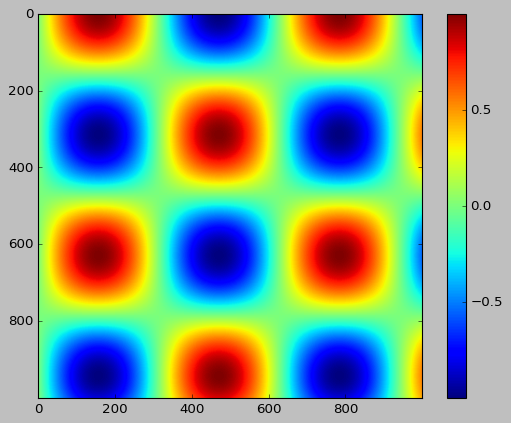

In [8]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

## Customizing colorbars

The colormaps can be specified using the `cmap` keyword.

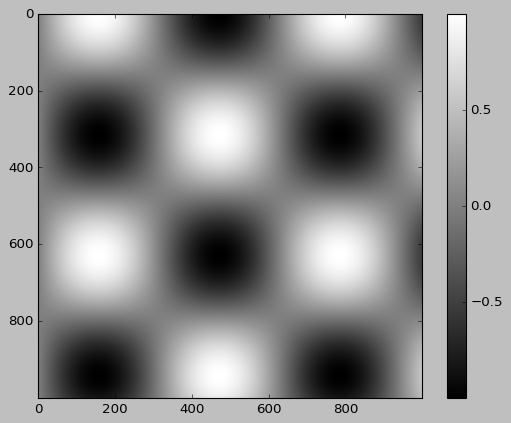

In [27]:
plt.imshow(I,cmap='gray')
plt.colorbar()

### Choosing a Colormap

Broadly, you should be aware of three different categories of colormaps:

- Sequential Colormaps: These are made up of one continuous sequence of colors(eg. `binary` or `viridis`)
- Divergent colormaps: These usually contain two distinct colors, which show positive and negative deviations from a mean(eg. `RdBu` or `PuOr`)
- Qualitative colormaps: These mix colors with no particular sequence (eg. `rainbow` or `jet`)

The jet colormap, whic hwas the default in Matplotlib prior to version 2.0 is an example of a qualitative colormap. It's status as the default was quite unfortunate because qualitative maps are often a poor choice for representing quantitative data. Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases.

C:\Users\denis\AppData\Local\Temp\ipykernel_7092\256621098.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\denis\AppData\Local\Temp\ipykernel_7092\256621098.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


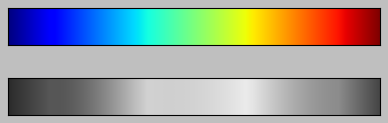

In [31]:
from matplotlib.colors import LinearSegmentedColormap



def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

view_colormap('jet')


If a rainbow themed colormapping is preferable then the `cubehelix` colormap can come handy

C:\Users\denis\AppData\Local\Temp\ipykernel_7092\256621098.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\denis\AppData\Local\Temp\ipykernel_7092\256621098.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


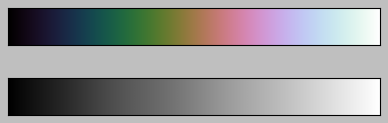

In [32]:
view_colormap('cubehelix')

For instances where a positive or negative deviation is supposed to be shown, a `RdBu` colormap can be used.

C:\Users\denis\AppData\Local\Temp\ipykernel_7092\256621098.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\denis\AppData\Local\Temp\ipykernel_7092\256621098.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


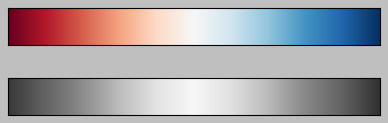

In [33]:
view_colormap('RdBu')

### Color limits and extensions

Matplotlib allows for a large range of colorbar customizatin. The colorbar itself is simply an instance of plt.Axes, so all of the axes and tick formatting tricks we've learned are applicable. The colorbar has some interesting flexibility: For example, we can narrow the color limits and indicate the out-of-bounds values with a traingular arrow at the top and bottom by setting the extend property. Thsi might come in handy, for example while displaying an image that is subject to noise:

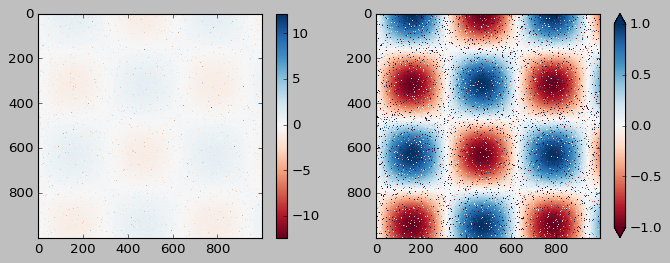

In [40]:
speckles=(np.random.random(I.shape)<.01)
I[speckles]=np.random.normal(0,3,np.count_nonzero(speckles))

plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
plt.imshow(I,cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in. In the right panel, we manually set the color limits, and add extensions to indicate values which are above or below those limits. The result is a much more useful visualization of our data.



### Discrete Color Bars

Usually the purpous of colormaps are to represent continuous data, but say we need discrete patches of colors to visualize our data. The easiest way to do this is to use the `plt.cm.get_cmap()` function.

C:\Users\denis\AppData\Local\Temp\ipykernel_7092\398315468.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))


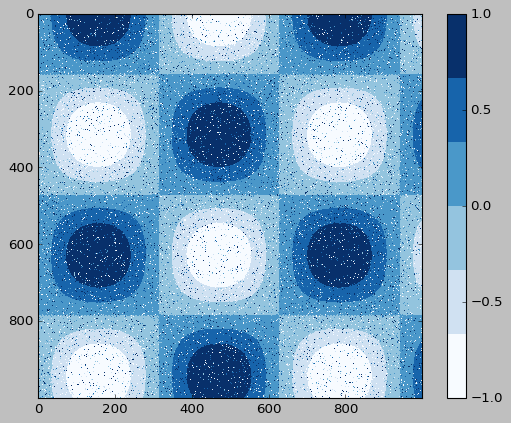

In [41]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)